In [3]:
!pip install numpy pandas matplotlib scikit-learn tensorflow keras opencv-python



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Load and preprocess data
DATASET_PATH = '/Users/siv3sh/Downloads/garbage_classification'

def load_and_preprocess_data(data_dir, img_size=(128, 128)):
    categories = os.listdir(data_dir)
    data, labels = [], []

    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                img_array = cv2.resize(img_array, img_size)
                data.append(img_array)
                labels.append(class_num)
            except Exception as e:
                print(f"Error loading image: {e}")

    data = np.array(data) / 255.0  # Normalize
    labels = np.array(labels)
    return data, labels

data, labels = load_and_preprocess_data(DATASET_PATH)
train_X, test_X, train_y, test_y = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f"Training Data Shape: {train_X.shape}")
print(f"Testing Data Shape: {test_X.shape}")


Training Data Shape: (12412, 128, 128, 3)
Testing Data Shape: (3103, 128, 128, 3)


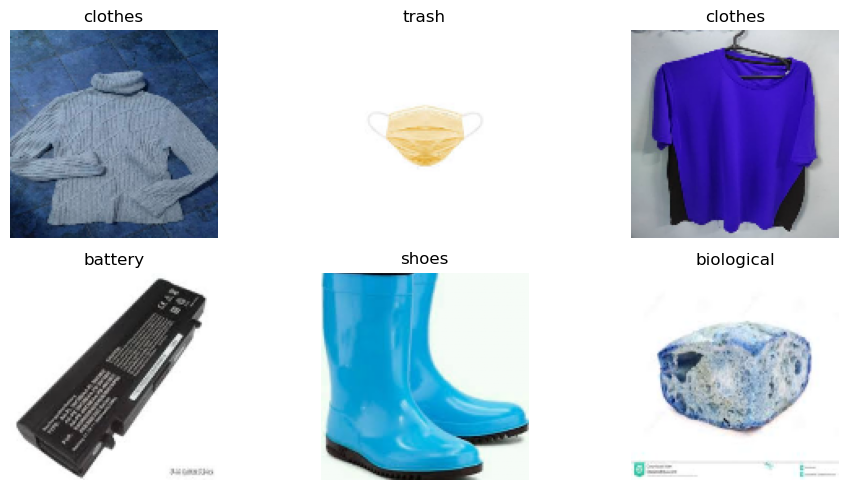

/var/folders/65/hh4dl_ys1wj4vcmzjpy1wy2w0000gn/T/ipykernel_81896/4041669051.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=category_names, palette="gray", order=categories)


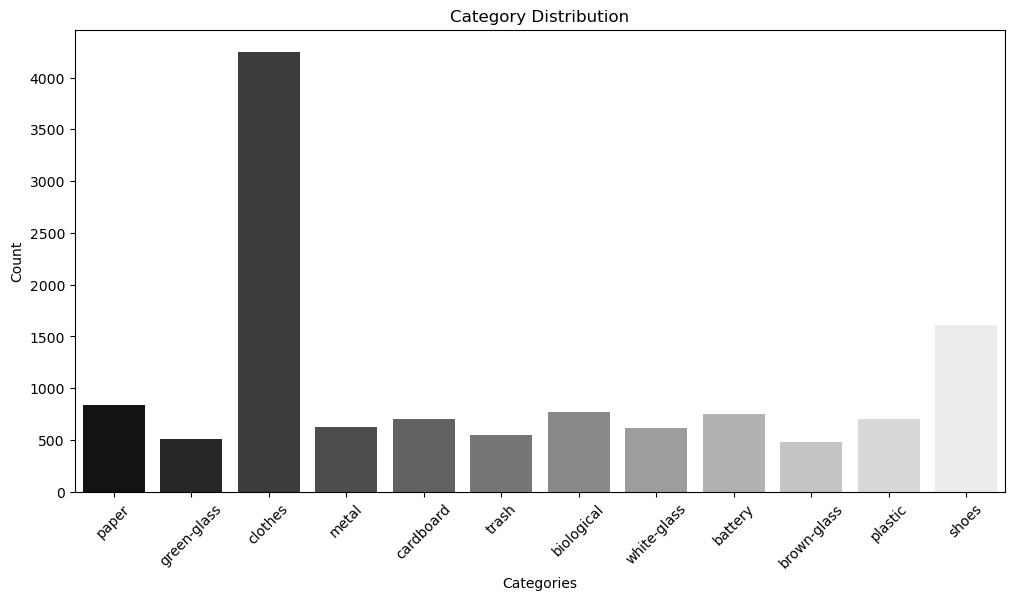

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Display a few images
categories = os.listdir('/Users/siv3sh/Downloads/garbage_classification')
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(train_X[i])
    plt.title(categories[train_y[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Map numeric labels to category names
category_names = [categories[label] for label in train_y]

# Plot category distribution with names on x-axis
plt.figure(figsize=(12, 6))
sns.countplot(x=category_names, palette="gray", order=categories)
plt.title("Category Distribution")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Reshape data for clustering
reshaped_data = train_X.reshape(len(train_X), -1)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=12, random_state=42)
clusters = kmeans.fit_predict(reshaped_data)

# Evaluate clustering
silhouette_avg = silhouette_score(reshaped_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.07556707575522832


In [7]:
class QLearningAgent:
    def __init__(self, state_size, action_size, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.q_table = np.zeros((state_size, action_size))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.q_table.shape[1])
        return np.argmax(self.q_table[state])

    def learn(self, state, action, reward, next_state):
        current = self.q_table[state, action]
        target = reward + self.gamma * np.max(self.q_table[next_state])
        self.q_table[state, action] += self.alpha * (target - current)

# Initialize agent
agent = QLearningAgent(state_size=12, action_size=12)


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(12, activation='softmax')  # 12 categories
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_X, train_y, epochs=10, validation_data=(test_X, test_y))
model.save('garbage_classification_model.h5')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 51s 131ms/step - accuracy: 0.4475 - loss: 1.9092 - val_accuracy: 0.6184 - val_loss: 1.1631
Epoch 2/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 47s 120ms/step - accuracy: 0.6862 - loss: 0.9282 - val_accuracy: 0.7180 - val_loss: 0.9047
Epoch 3/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 103s 265ms/step - accuracy: 0.7782 - loss: 0.6688 - val_accuracy: 0.7364 - val_loss: 0.8889
Epoch 4/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 147s 379ms/step - accuracy: 0.8674 - loss: 0.4112 - val_accuracy: 0.7306 - val_loss: 1.0074
Epoch 5/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 47s 121ms/step - accuracy: 0.9238 - loss: 0.2442 - val_accuracy: 0.7219 - val_loss: 1.1278
Epoch 6/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 47s 120ms/step - accuracy: 0.9497 - loss: 0.1564 - val_accuracy: 0.7377 - val_loss: 1.2763
Epoch 7/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 48s 124ms/step - accuracy: 0.9673 - loss: 0.1052 - val_accuracy: 0.6909 - val_loss: 1.5260
Epoch 8/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 47s 121ms/step - accuracy: 0.9753 - loss:

In [9]:
from sklearn.metrics import classification_report

# Predictions
pred_y = np.argmax(model.predict(test_X), axis=1)

# Classification Report
print(classification_report(test_y, pred_y, target_names=categories))


97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step
              precision    recall  f1-score   support

       paper       0.81      0.47      0.59       214
 green-glass       0.81      0.87      0.84       119
     clothes       0.82      0.95      0.88      1075
       metal       0.41      0.32      0.36       142
   cardboard       0.92      0.45      0.60       191
       trash       0.71      0.57      0.63       150
  biological       0.66      0.62      0.64       212
 white-glass       0.53      0.60      0.56       156
     battery       0.51      0.61      0.55       192
 brown-glass       0.59      0.68      0.63       123
     plastic       0.52      0.50      0.51       164
       shoes       0.59      0.59      0.59       365

    accuracy                           0.70      3103
   macro avg       0.66      0.60      0.62      3103
weighted avg       0.70      0.70      0.69      3103



In [10]:
import cv2

def classify_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128)) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    return categories[np.argmax(prediction)]

# Test with a sample image
result = classify_image('/Users/siv3sh/Downloads/garbage_classification/shoes/shoes997.jpg')
print(f"Predicted Category: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Category: shoes


In [11]:
# import cv2
# import numpy as np
# from tensorflow.keras.models import load_model

# # Load your trained model
# model = load_model('garbage_classification_model.h5')  # Update with the correct path to your model

# # Define your categories
# categories = ['White glass', 'Trash', 'Shoes', 'Plastic', 'Paper', 'Metal', 'Green glass', 
#               'Clothes', 'Cardboard', 'Brown glass', 'Biological', 'Battery']

# def preprocess_image(image, img_size=(128, 128)):
#     """
#     Preprocess the image for the model:
#     - Resize to match the input size of the model.
#     - Normalize pixel values to [0, 1].
#     """
#     img = cv2.resize(image, img_size)
#     img = img / 255.0  # Normalize pixel values
#     img = np.expand_dims(img, axis=0)  # Add batch dimension
#     return img

# # Initialize the webcam
# cap = cv2.VideoCapture(0)

# if not cap.isOpened():
#     print("Error: Could not open webcam")
# else:
#     print("Press 'q' to exit")

# while True:
#     # Capture a frame from the webcam
#     ret, frame = cap.read()
#     if not ret:
#         print("Failed to grab frame")
#         break

#     # Convert the frame to grayscale for contour detection
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     blurred = cv2.GaussianBlur(gray, (5, 5), 0)
#     _, thresh = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY_INV)

#     # Find contours in the thresholded image
#     contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     if contours:
#         # Filter contours by size to avoid small false positives
#         valid_contours = [c for c in contours if cv2.contourArea(c) > 500]

#         for contour in valid_contours:
#             # Get bounding box for the contour
#             x, y, w, h = cv2.boundingRect(contour)

#             # Extract the ROI and preprocess it for the model
#             roi = frame[y:y+h, x:x+w]
#             if roi.size > 0:  # Ensure ROI is valid
#                 preprocessed_roi = preprocess_image(roi)

#                 # Predict the category using the trained model
#                 prediction = model.predict(preprocessed_roi)
#                 predicted_category = categories[np.argmax(prediction)]
#                 confidence = np.max(prediction)

#                 # Draw the bounding box and label on the frame
#                 label = f"{predicted_category} ({confidence:.2f})"
#                 cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
#                 cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

#     # Display the frame
#     cv2.imshow("Real-Time Detection", frame)

#     # Exit the loop if 'q' is pressed
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the webcam and close the window
# cap.release()
# cv2.destroyAllWindows()


In [12]:
# def preprocess_image(image, img_size=(128, 128)):
#     # Resize and normalize the image
#     img = cv2.resize(image, img_size) / 255.0
#     img = np.expand_dims(img, axis=0)  # Add batch dimension
#     return img

# # Preprocess the captured image
# preprocessed_image = preprocess_image(captured_img)

# # Predict using the trained model
# prediction = model.predict(preprocessed_image)
# predicted_category = categories[np.argmax(prediction)]

# print(f"Predicted Category: {predicted_category}")


In [13]:
import os
from PIL import Image

# Example folder structure: 'dataset/category_name/image.jpg'
dataset_path = "/Users/siv3sh/Downloads/garbage_classification"
categories = ["white-glass", "trash", "shoes", "plastic", "paper", "metal", 
              "green-glass", "clothes", "cardboard", "brown-glass", 
              "biological", "battery"]

images = []
labels = []

# Load images and labels
for category_idx, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    if not os.path.exists(category_path):
        print(f"Category folder not found: {category_path}")
        continue
    for file in os.listdir(category_path):
        file_path = os.path.join(category_path, file)
        try:
            # Open and convert image to RGB
            img = Image.open(file_path).convert('RGB')
            img = img.resize((128, 128))  # Resize images to a standard size
            images.append(np.array(img))
            labels.append(category_idx)  # Label as the index of the category
        except Exception as e:
            print(f"Error loading image {file_path}: {e}")

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

print(f"Loaded {len(images)} images with {len(labels)} labels")


Loaded 15515 images with 15515 labels


/var/folders/65/hh4dl_ys1wj4vcmzjpy1wy2w0000gn/T/ipykernel_81896/3296501197.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette=["black"])
/var/folders/65/hh4dl_ys1wj4vcmzjpy1wy2w0000gn/T/ipykernel_81896/3296501197.py:11: UserWarning: 
The palette list has fewer values (1) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=label_counts.index, y=label_counts.values, palette=["black"])


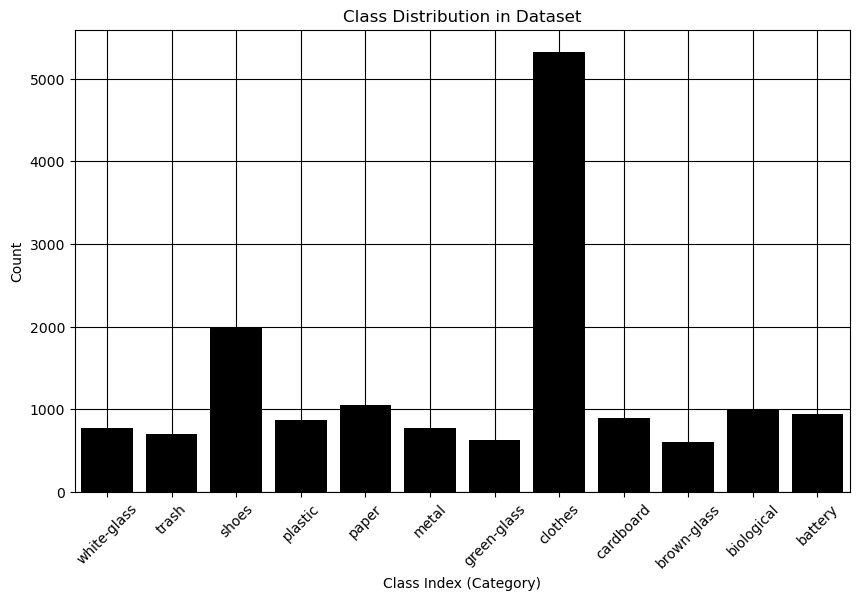

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
unique_labels, counts = np.unique(labels, return_counts=True)

label_counts = pd.Series(counts, index=categories)

# Example code with black and white theme
plt.figure(figsize=(10, 6))

# Use a black and white palette for the barplot
sns.barplot(x=label_counts.index, y=label_counts.values, palette=["black"])

plt.title("Class Distribution in Dataset", color='black')
plt.xlabel("Class Index (Category)", color='black')
plt.ylabel("Count", color='black')

# Set x-ticks to categories with black color
plt.xticks(ticks=range(len(categories)), labels=categories, rotation=45, color='black')

# Set background to white
plt.gcf().set_facecolor('white')
plt.gca().set_facecolor('white')

# Optional: Make gridlines black
plt.grid(True, color='black')

# Show the plot
plt.show()


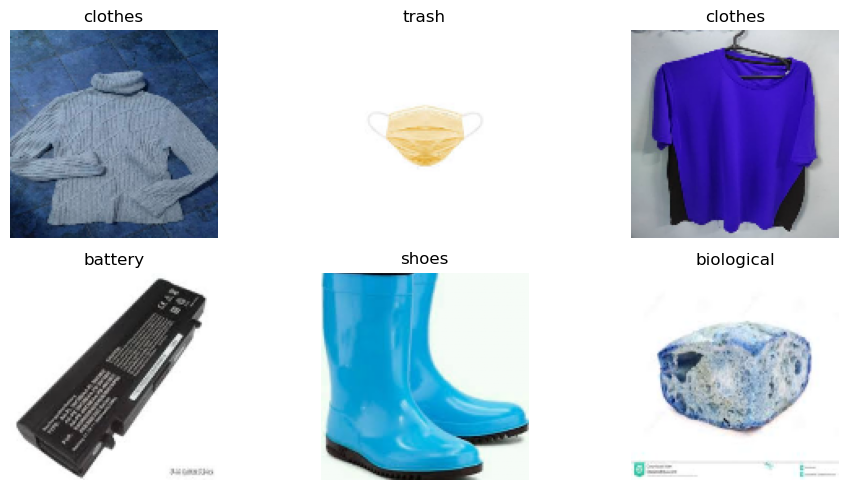

/var/folders/65/hh4dl_ys1wj4vcmzjpy1wy2w0000gn/T/ipykernel_81896/682500621.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=category_names, palette="viridis", order=categories)


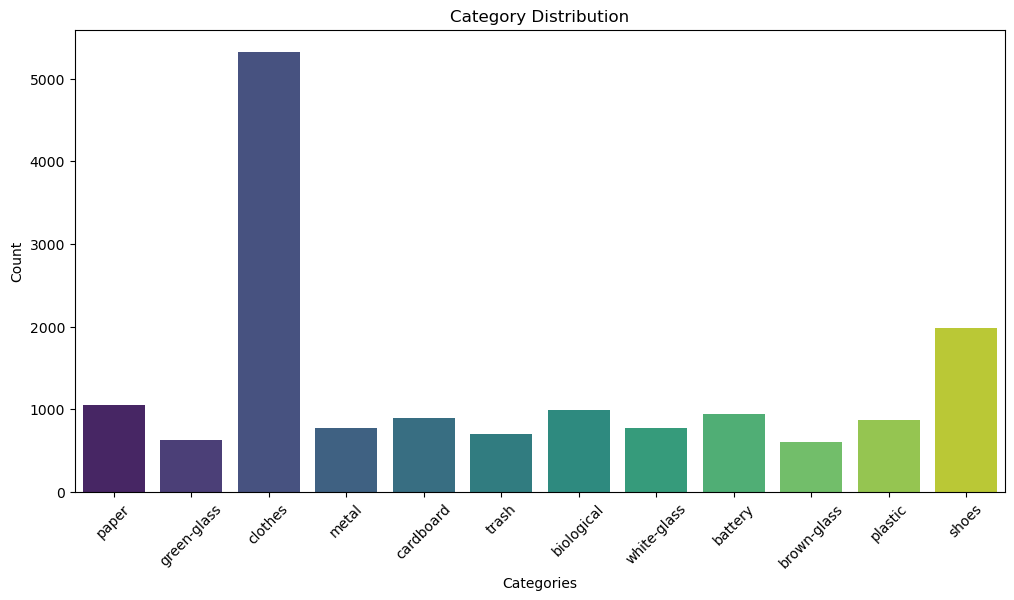

In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Simulated dataset directory structure for testing visualizations
DATASET_PATH = '/Users/siv3sh/Downloads/garbage_classification'

# Function to load and preprocess data
def load_and_preprocess_data(data_dir, img_size=(128, 128)):
    categories = os.listdir(data_dir)
    data, labels = [], []

    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                img_array = cv2.resize(img_array, img_size)
                data.append(img_array)
                labels.append(class_num)
            except Exception as e:
                print(f"Error loading image: {e}")

    data = np.array(data) / 255.0  # Normalize
    labels = np.array(labels)
    return data, labels, categories

# Load the dataset
try:
    data, labels, categories = load_and_preprocess_data(DATASET_PATH)
    train_X, test_X, train_y, test_y = train_test_split(data, labels, test_size=0.2, random_state=42)

    # Sample Images Display
    plt.figure(figsize=(10, 5))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(train_X[i])
        plt.title(categories[train_y[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Category Distribution
    category_names = [categories[label] for label in labels]
    plt.figure(figsize=(12, 6))
    sns.countplot(x=category_names, palette="viridis", order=categories)
    plt.title("Category Distribution")
    plt.xlabel("Categories")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

except Exception as e:
    print(f"Error visualizing dataset: {e}")

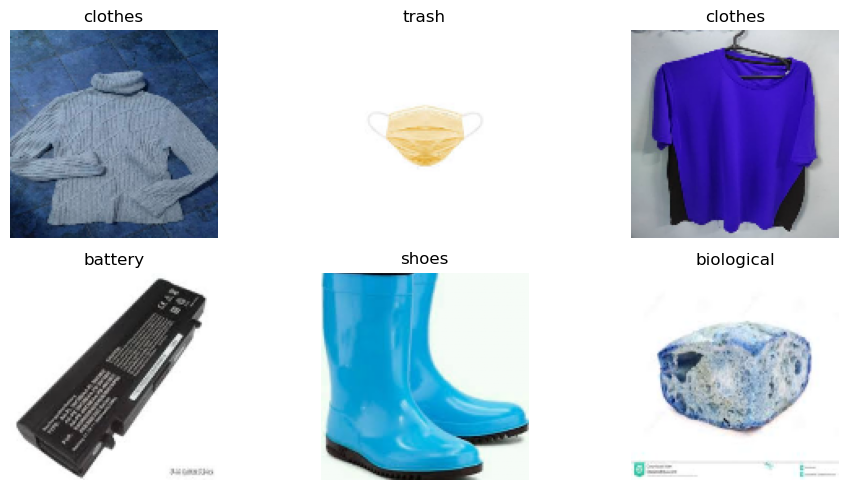

/var/folders/65/hh4dl_ys1wj4vcmzjpy1wy2w0000gn/T/ipykernel_81896/1273546110.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=category_names, palette="viridis", order=categories)


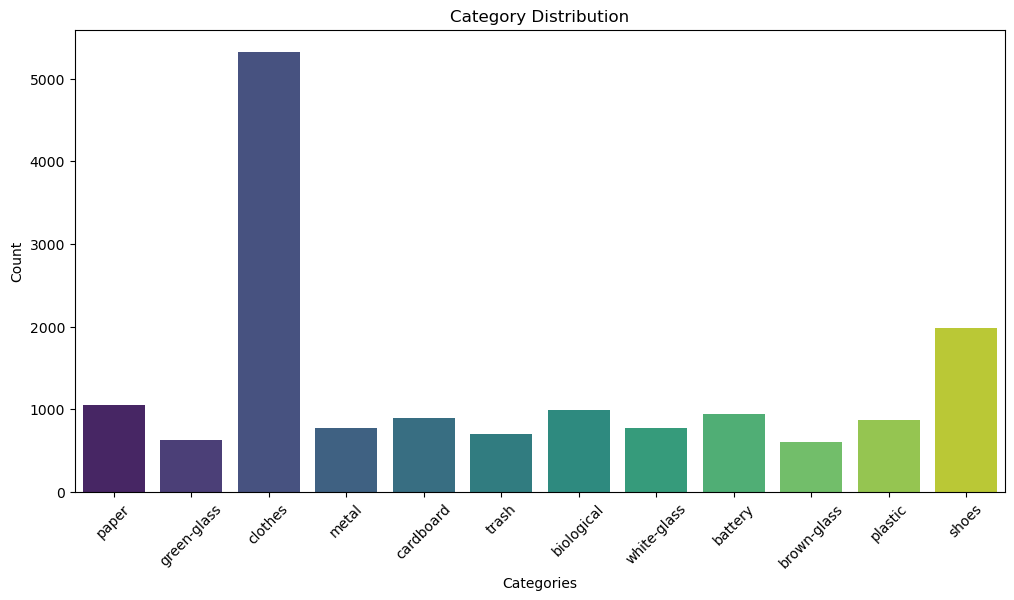

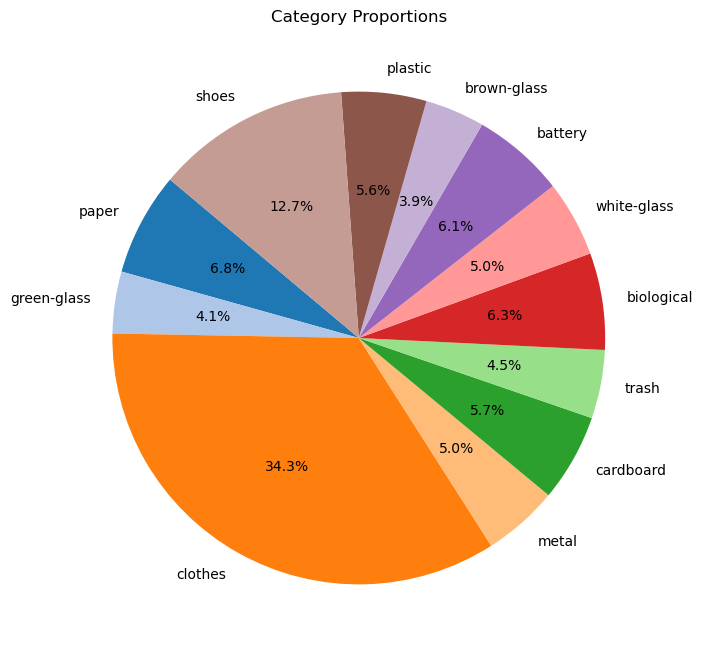

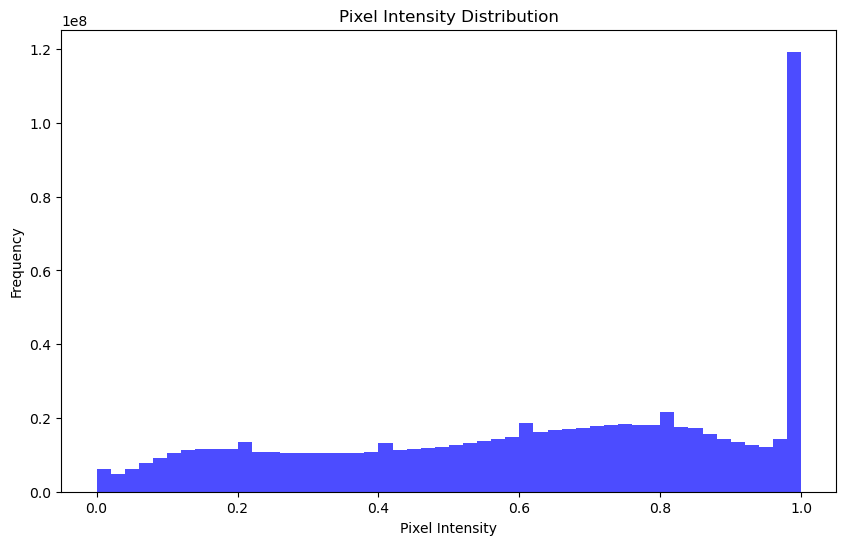

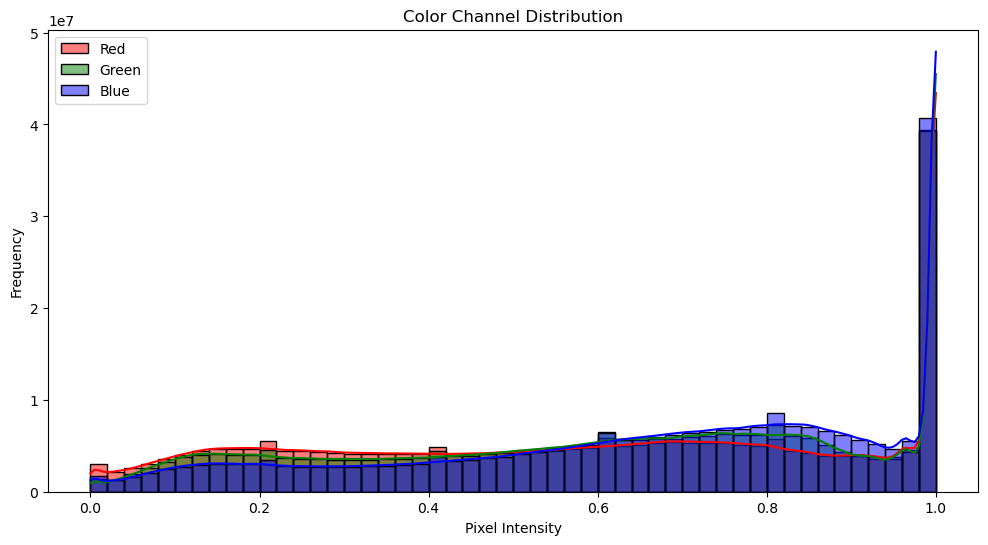

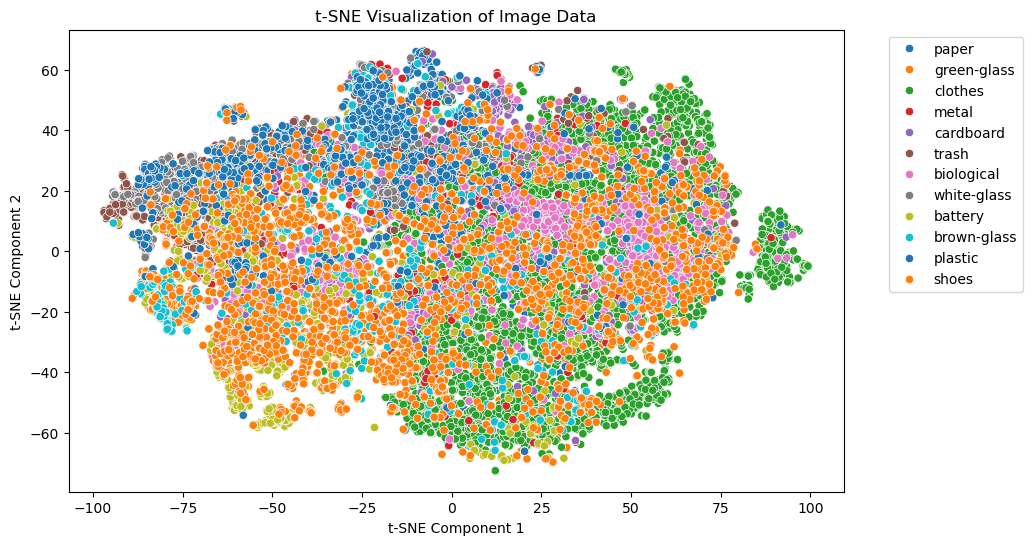

In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

# Function to load and preprocess data
def load_and_preprocess_data(data_dir, img_size=(128, 128)):
    categories = os.listdir(data_dir)
    data, labels = [], []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                img_array = cv2.resize(img_array, img_size)
                data.append(img_array)
                labels.append(class_num)
            except Exception as e:
                print(f"Error loading image: {e}")
    data = np.array(data) / 255.0  # Normalize
    labels = np.array(labels)
    return data, labels, categories

# Load dataset
DATASET_PATH = '/Users/siv3sh/Downloads/garbage_classification'
data, labels, categories = load_and_preprocess_data(DATASET_PATH)
train_X, test_X, train_y, test_y = train_test_split(data, labels, test_size=0.2, random_state=42)

# 1. Display Sample Images
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(train_X[i])
    plt.title(categories[train_y[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

# 2. Category Distribution
category_names = [categories[label] for label in labels]
plt.figure(figsize=(12, 6))
sns.countplot(x=category_names, palette="viridis", order=categories)
plt.title("Category Distribution")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 3. Pie Chart for Category Proportions
plt.figure(figsize=(8, 8))
category_counts = [np.sum(labels == i) for i in range(len(categories))]
plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Category Proportions")
plt.show()

# 4. Pixel Intensity Histogram
flattened_pixels = data.reshape(-1, data.shape[-1])
plt.figure(figsize=(10, 6))
plt.hist(flattened_pixels.ravel(), bins=50, color='blue', alpha=0.7)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

# 5. RGB Channel Analysis
colors = ['red', 'green', 'blue']
plt.figure(figsize=(12, 6))
for i, color in enumerate(colors):
    channel = flattened_pixels[:, i]
    sns.histplot(channel, color=color, kde=True, bins=50, label=color.capitalize())
plt.title("Color Channel Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 6. t-SNE Visualization for High-Dimensional Data
pca = PCA(n_components=50)  # Reduce dimensions first for t-SNE
data_pca = pca.fit_transform(data.reshape(len(data), -1))
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_pca)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=[categories[label] for label in labels], palette="tab10")
plt.title("t-SNE Visualization of Image Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.show()


Total Samples: 15515
Categories: ['paper', 'green-glass', 'clothes', 'metal', 'cardboard', 'trash', 'biological', 'white-glass', 'battery', 'brown-glass', 'plastic', 'shoes']
Samples per Category: {'paper': 1050, 'green-glass': 629, 'clothes': 5325, 'metal': 769, 'cardboard': 891, 'trash': 697, 'biological': 985, 'white-glass': 775, 'battery': 945, 'brown-glass': 607, 'plastic': 865, 'shoes': 1977}
Class Imbalance Ratio: 8.772652388797365
Channel Means (RGB): [0.58539271 0.61596882 0.65781819]
Channel Variances (RGB): [0.09321111 0.08502127 0.07865004]
Brightness Mean: 0.6197265724505674
Brightness Variance: 0.07898521995322538


/var/folders/65/hh4dl_ys1wj4vcmzjpy1wy2w0000gn/T/ipykernel_81896/133129020.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(stats["samples_per_category"].keys()), y=list(stats["samples_per_category"].values()), palette="viridis")


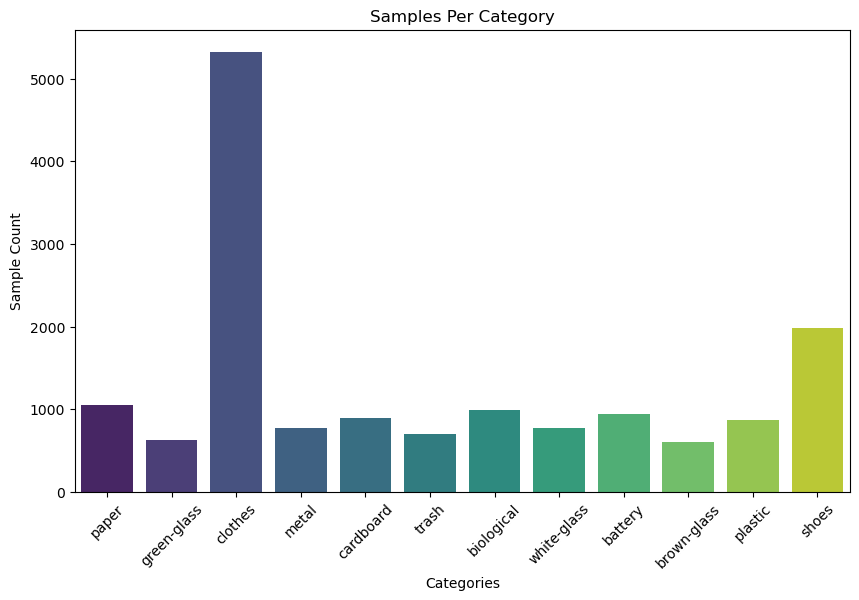

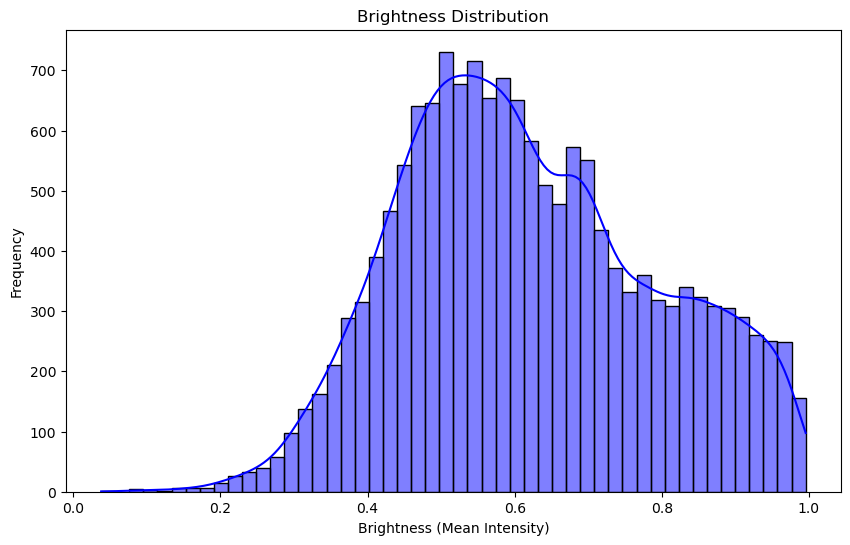

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate dataset statistics
def calculate_statistics(data, labels, categories):
    stats = {}
    stats["total_samples"] = len(data)
    stats["categories"] = categories
    stats["samples_per_category"] = {cat: np.sum(labels == i) for i, cat in enumerate(categories)}
    stats["class_imbalance_ratio"] = max(stats["samples_per_category"].values()) / min(stats["samples_per_category"].values())
    
    # Per-channel pixel stats
    data_flat = data.reshape(-1, data.shape[-1])  # Flatten data for pixel-level stats
    stats["channel_means"] = np.mean(data_flat, axis=0)
    stats["channel_variances"] = np.var(data_flat, axis=0)
    
    # Brightness
    grayscale_values = np.mean(data, axis=-1)  # Average over RGB channels
    stats["brightness_mean"] = np.mean(grayscale_values)
    stats["brightness_variance"] = np.var(grayscale_values)
    
    # Return calculated stats
    return stats

# Calculate statistics
stats = calculate_statistics(data, labels, categories)

# Display Statistics
print(f"Total Samples: {stats['total_samples']}")
print(f"Categories: {stats['categories']}")
print(f"Samples per Category: {stats['samples_per_category']}")
print(f"Class Imbalance Ratio: {stats['class_imbalance_ratio']}")
print(f"Channel Means (RGB): {stats['channel_means']}")
print(f"Channel Variances (RGB): {stats['channel_variances']}")
print(f"Brightness Mean: {stats['brightness_mean']}")
print(f"Brightness Variance: {stats['brightness_variance']}")

# Visualize Samples Per Category
plt.figure(figsize=(10, 6))
sns.barplot(x=list(stats["samples_per_category"].keys()), y=list(stats["samples_per_category"].values()), palette="viridis")
plt.title("Samples Per Category")
plt.xlabel("Categories")
plt.ylabel("Sample Count")
plt.xticks(rotation=45)
plt.show()

# Brightness Distribution
plt.figure(figsize=(10, 6))
sns.histplot(np.mean(data, axis=(1, 2, 3)), bins=50, kde=True, color="blue")
plt.title("Brightness Distribution")
plt.xlabel("Brightness (Mean Intensity)")
plt.ylabel("Frequency")
plt.show()
